In [ ]:
# Import the package
import random
import time
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.firefox.service import Service

### Define position and location

In [ ]:
## Enter a job position
position = "data+analyst"
## Enter a location (City, State or Zip or remote)
locations = "USA"

def get_url(position, location):
    url_template = "https://www.indeed.com/jobs?q={}&l={}"
    url = url_template.format(position, location)
    return url

url = get_url(position, locations)
print(url)

https://www.indeed.com/jobs?q=data+analyst&l=USA


### Path to webdriver

In [ ]:
# Path to driver file
driver_path = "/Users"
# Define firefox driver
service = Service(executable_path=driver_path)
driver = webdriver.Firefox(service=service)

### Scrape Job Postings

In [ ]:
## Number of postings to scrape
postings = 1250

dataframe = []
dataframe = pd.DataFrame(columns=["Title", "Company", "Location", "Rating", "Date", "Salary", "Description", "Links"])
jn=0
for i in range(0, postings, 10):
    driver.get(url + "&start=" + str(i))
    driver.implicitly_wait(3)

    jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

    for job in jobs:
        result_html = job.get_attribute('innerHTML')
        soup = BeautifulSoup(result_html, 'html.parser')

        jn += 1

        liens = job.find_elements(By.TAG_NAME, "a")
        links = liens[0].get_attribute("href")

        title = soup.select('.jobTitle')[0].get_text().strip()
        try:
            company = soup.find_all(attrs={'data-testid': 'company-name'})[0].get_text().strip()

        except:
            company = 'NaN'

        try:
            location = soup.find_all(attrs={'data-testid': 'text-location'})[0].get_text().strip()

        except:
            location = 'NaN'

        try:
            salary = soup.select('.salary-snippet-container')[0].get_text().strip()
        except:
            salary = 'NaN'

        try:
            rating = soup.find("div",{"class":"companyInfo"}).find("span",{"class":"ratingsDisplay"}).text #scrapfly version
        except:
            rating = 'NaN'

        try:
            date = soup.find_all('span',attrs={'data-testid': 'myJobsStateDate'})[0].get_text().strip()
            words_posted_today = ["Today" , "Just", "ongoing"]
            if "ago" in date:
                date_temp = date.split()
                date_temp = date_temp[-3:]
                date = (date_temp[0] + ' ' + date_temp[1] + ' ' + date_temp[2])
            elif any(x in date for x in words_posted_today):
                date = "0 days ago"
            else:
                date = 'NaN'
        except:
            date = 'NaN'

        try:
            description = soup.select('.job-snippet')[0].get_text().strip()
        except:
            description = ''

        dataframe = pd.concat([dataframe, pd.DataFrame([{'Title': title,
                                          "Company": company,
                                          'Location': location,
                                          'Rating': rating,
                                          'Date': date,
                                          "Salary": salary,
                                          "Description": description,
                                          "Links": links}])], ignore_index=True)
        print("Job number {0:4d} added - {1:s}".format(jn,title))

Job number    1 added - Board Certified Behavior Analyst (BCBA)
Job number    2 added - Data Analyst, Digital Marketing
Job number    3 added - Data Analyst, Commercial Buildings and Integrated Systems
Job number    4 added - Procurement Data Analyst - Negotiation Expert
Job number    5 added - Product Marketing & Sales Operations Analyst
Job number    6 added - Senior FP&A Analyst
Job number    7 added - Contract E-commerce Data Analyst
Job number    8 added - Data Analyst II
Job number    9 added - Sr. Data Analyst, Business Intelligence (on-site Charleston, SC)
Job number   10 added - Data Analyst, Senior Specialist
Job number   11 added - Data Analyst
Job number   12 added - Jr SQL Dev/Data Analyst/BA/React
Job number   13 added - DATA ANALYST
Job number   14 added - Data Analyst I
Job number   15 added - Business Intelligence Analyst
Job number   16 added - Data & BI Analyst I
Job number   17 added - Product Marketing & Sales Operations Analyst
Job number   18 added - Entry Level 

In [ ]:
# Remove duplicates and assign the result back
dataframe = dataframe.drop_duplicates()
# Reset the index
dataframe.reset_index(drop=True, inplace=True)
# View the dataset
dataframe

,Title,Company,Location,Rating,Date,Salary,Description,Links
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040",NaN,0 days ago,"$75,000 - $110,000 a year",,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,"Data Analyst, Digital Marketing",Savant Wealth Management,"Lincolnshire, IL 60069",NaN,30+ days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,"Data Analyst, Commercial Buildings and Integra...",Northwest Energy Efficiency Alliance,"Hybrid remote in Portland, OR 97204",NaN,16 days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,Procurement Data Analyst - Negotiation Expert,Norwalt Design Inc.,"Tampa, FL 33619",NaN,30+ days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,Product Marketing & Sales Operations Analyst,"Premier Manufacturing, Inc.","Chesterfield, MO",NaN,2 days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
...,...,...,...,...,...,...,...,...
1868,Technical Data Analyst,MTF Biologics,Remote in United States,NaN,0 days ago,NaN,,https://www.indeed.com/rc/clk?jk=b8ea8fa1865c0...
1869,Data Analyst,Foot Locker,Hybrid remote in United States,NaN,9 days ago,NaN,,https://www.indeed.com/rc/clk?jk=d95982947349b...
1870,Research Data Analyst 1,Oregon Health & Science University,United States,NaN,1 day ago,NaN,,https://www.indeed.com/rc/clk?jk=4677c33549e56...
1871,Data Analyst,Movement Mortgage,United States,NaN,15 days ago,NaN,,https://www.indeed.com/rc/clk?jk=abc56875cf08d...


### Scrape Full Job Descriptions

In [ ]:
Links_list = dataframe['Links'].tolist()
#Links_list

In [ ]:
# Process first 100 links
descriptions=[]
for i in Links_list[:100]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[:99, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (101-200)
descriptions=[]
for i in Links_list[100:200]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[100:199, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (201-300)
descriptions=[]
for i in Links_list[200:300]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[200:299, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (301-400)
descriptions=[]
for i in Links_list[300:400]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[300:399, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (401-500)
descriptions=[]
for i in Links_list[400:500]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[400:499, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (501-600)
descriptions=[]
for i in Links_list[500:600]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[500:599, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (601-700)
descriptions=[]
for i in Links_list[600:700]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[600:699, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (701-800)
descriptions=[]
for i in Links_list[700:800]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[700:799, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (801-900)
descriptions=[]
for i in Links_list[800:900]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[800:899, 'Descriptions'] = descriptions

In [ ]:
# Process next 100 links (901-1000)
descriptions=[]
for i in Links_list[900:1000]:
    driver.get(i)
    driver.implicitly_wait(random.randint(3, 8))
    jd = driver.find_element(By.XPATH, '//div[@id="jobDescriptionText"]').text
    descriptions.append(jd)
    time.sleep(random.randint(5,10))

dataframe.loc[900:999, 'Descriptions'] = descriptions

In [ ]:
# Only want the 1000 which have done full job description scraping
dataframe = dataframe.iloc[:1000]

In [ ]:
# View dataframe
dataframe

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040",NaN,0 days ago,"$75,000 - $110,000 a year",,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Responsibilities:\n- Conduct assessments and d...
1,"Data Analyst, Digital Marketing",Savant Wealth Management,"Lincolnshire, IL 60069",NaN,30+ days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Are you a data-driven storyteller? Do you have...
2,"Data Analyst, Commercial Buildings and Integra...",Northwest Energy Efficiency Alliance,"Hybrid remote in Portland, OR 97204",NaN,16 days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Catalyzing the most efficient use of energy fo...
3,Procurement Data Analyst - Negotiation Expert,Norwalt Design Inc.,"Tampa, FL 33619",NaN,30+ days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Are you a skilled negotiator with a passion fo...
4,Product Marketing & Sales Operations Analyst,"Premier Manufacturing, Inc.","Chesterfield, MO",NaN,2 days ago,NaN,,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Tobacco company seeking a talented and detail-...
...,...,...,...,...,...,...,...,...,...
995,Senior Data Analyst,Capillary Technologies,"Minneapolis, MN 55401 (North Loop area)",NaN,30+ days ago,NaN,,https://www.indeed.com/rc/clk?jk=4b108c1f9f17f...,Capillary Technologies is a leading global pro...
996,Strategic Modeling and Simulation Data Analyst,Booz Allen,"Barksdale AFB, LA",NaN,13 days ago,"$58,300 - $133,000 a year",,https://www.indeed.com/rc/clk?jk=6cc8bb0060faa...,Strategic Modeling and Simulation Data Analyst...
997,Operations Data Analyst,South Florida Community Care Network Llc,"Hybrid remote in Fort Lauderdale, FL 33323",NaN,30+ days ago,NaN,,https://www.indeed.com/rc/clk?jk=ccaeb4bdd855a...,**MUST BE WILLING TO PHYSICALLY WORK NEAR SUNR...
998,Technical Data Analyst,MTF Biologics,Remote in United States,NaN,0 days ago,NaN,,https://www.indeed.com/rc/clk?jk=b8ea8fa1865c0...,Overview/Risks:\nThe TDA will gather and repor...


In [ ]:
# Stop the driver
driver.quit()

## Save Results

In [ ]:
# Convert the dataframe to a csv file
date = datetime.today().strftime('%Y-%m-%d')
dataframe.to_csv(date + "_" + position + "_" + locations + ".csv", index=False)

In [1]:
# Import package
import random
import time
import pandas as pd

In [ ]:
# Import the dataset
df = pd.read_csv("webscraping_results.csv", encoding= "latin1")
# Replace all the empty data to the string unknown
df = df.fillna("unknown")
df

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040",unknown,0 days ago,"$75,000 - $110,000 a year",unknown,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Responsibilities:\n- Conduct assessments and d...
1,"Data Analyst, Digital Marketing",Savant Wealth Management,"Lincolnshire, IL 60069",unknown,30+ days ago,unknown,unknown,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Are you a data-driven storyteller? Do you have...
2,"Data Analyst, Commercial Buildings and Integra...",Northwest Energy Efficiency Alliance,"Hybrid remote in Portland, OR 97204",unknown,16 days ago,unknown,unknown,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Catalyzing the most efficient use of energy fo...
3,Procurement Data Analyst - Negotiation Expert,Norwalt Design Inc.,"Tampa, FL 33619",unknown,30+ days ago,unknown,unknown,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Are you a skilled negotiator with a passion fo...
4,Product Marketing & Sales Operations Analyst,"Premier Manufacturing, Inc.","Chesterfield, MO",unknown,2 days ago,unknown,unknown,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Tobacco company seeking a talented and detail-...
...,...,...,...,...,...,...,...,...,...
995,Senior Data Analyst,Capillary Technologies,"Minneapolis, MN 55401Â (North Loop area)",unknown,30+ days ago,unknown,unknown,https://www.indeed.com/rc/clk?jk=4b108c1f9f17f...,Capillary Technologies is a leading global pro...
996,Strategic Modeling and Simulation Data Analyst,Booz Allen,"Barksdale AFB, LA",unknown,13 days ago,"$58,300 - $133,000 a year",unknown,https://www.indeed.com/rc/clk?jk=6cc8bb0060faa...,Strategic Modeling and Simulation Data Analyst...
997,Operations Data Analyst,South Florida Community Care Network Llc,"Hybrid remote in Fort Lauderdale, FL 33323",unknown,30+ days ago,unknown,unknown,https://www.indeed.com/rc/clk?jk=ccaeb4bdd855a...,**MUST BE WILLING TO PHYSICALLY WORK NEAR SUNR...
998,Technical Data Analyst,MTF Biologics,Remote in United States,unknown,0 days ago,unknown,unknown,https://www.indeed.com/rc/clk?jk=b8ea8fa1865c0...,Overview/Risks:\nThe TDA will gather and repor...


### Use OpenAI to generate skills

In [3]:
# Install package
!pip install openai==0.28
import openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.1 MB/s eta 0:00:00


In [ ]:
# API Key
from google.colab import drive
drive.mount('/content/drive')
API_KEY= "KEY"

# OpenAI Key
import os
os.environ['OPENAI_API_KEY'] = API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

Mounted at /content/drive


In [5]:
# OpenAI API parameters
model = "gpt-3.5-turbo-16k"
# model = "gpt-3.5-turbo" # 4K tokens
# model = "gpt-4"
max_tokens = 1024
n = 1
stop = None
temperature = 0.5

### Prompt 1

In [6]:
text = "Skills such as data visualization, statistical analysis, and machine learning."

In [7]:
prompt_1 = 'List some skills that required for Data Analytics position: "{input}"'

In [8]:
prompt1 = prompt_1.format(input=text)
response1 = openai.ChatCompletion.create(
    model=model,
    messages=[
    {"role": "system", "content": "You are a helpful  assistant."},
    {"role": "user", "content": prompt1},
    ],
    max_tokens=max_tokens,
    n=n,
    stop=stop,
    temperature=temperature,
)

In [9]:
output1 = response1['choices'][0]['message']['content']
print(output1)

Some skills required for a Data Analytics position include:

1. Data visualization: Ability to effectively present data through charts, graphs, and other visual formats to communicate insights and trends.

2. Statistical analysis: Proficiency in statistical methods and techniques to analyze and interpret data, including hypothesis testing, regression analysis, and data modeling.

3. Machine learning: Knowledge of machine learning algorithms and techniques to develop predictive models and make data-driven decisions.

4. Programming: Strong programming skills, particularly in languages such as Python or R, to manipulate and analyze large datasets.

5. SQL: Proficiency in SQL (Structured Query Language) to extract, transform, and analyze data from databases.

6. Data cleaning and preprocessing: Ability to clean and preprocess raw data to ensure accuracy and reliability in analysis.

7. Data mining: Familiarity with data mining techniques to discover patterns, relationships, and insights f

### Prompt 2

In [10]:
text = "Skills such as Python, Data Management, Consulting, Creativity etc."

In [11]:
prompt_2 = 'List some skills that required for Data Analytics position form the follwoing perspectives: programming skills, technical skills, business skills and teamwork skills: "{input}"'

In [12]:
prompt2 = prompt_2.format(input=text)
response2 = openai.ChatCompletion.create(
    model=model,
    messages=[
    {"role": "system", "content": "You are a helpful  assistant."},
    {"role": "user", "content": prompt2},
    ],
    max_tokens=max_tokens,
    n=n,
    stop=stop,
    temperature=temperature,
)

In [13]:
output2 = response2['choices'][0]['message']['content']
print(output2)

From the perspectives of programming skills, technical skills, business skills, and teamwork skills, here are some skills required for a Data Analytics position:

1. Programming Skills:
   - Python (as mentioned)
   - R
   - SQL
   - Java
   - MATLAB

2. Technical Skills:
   - Data management (as mentioned)
   - Data visualization
   - Statistical analysis
   - Machine learning algorithms
   - Predictive modeling

3. Business Skills:
   - Consulting (as mentioned)
   - Problem-solving
   - Critical thinking
   - Domain knowledge (e.g., finance, marketing, healthcare)
   - Communication skills

4. Teamwork Skills:
   - Collaboration
   - Effective communication
   - Project management
   - Ability to work in cross-functional teams
   - Adaptability and flexibility

5. Other Skills:
   - Creativity (as mentioned)
   - Data storytelling
   - Data ethics and privacy awareness
   - Data-driven decision making
   - Continuous learning and curiosity

It's important to note that the specific s

In [ ]:
results = pd.read_csv('webscraping_results.csv')

### Four Categories

In [15]:
## Programming/systems skills
sskills = {}
sskills['Excel'] = []
sskills['SQL'] = []
sskills['Python'] = []
sskills['R'] = []
sskills['Matlab'] = []
sskills['SAS'] = []
sskills['Java'] = []
sskills['Tableau'] = []


## Technical, data-related, modeling/algorithms skills
tskills = {}
tskills['Data Management'] = []
tskills['Machine Learning']=[]
tskills['Modeling']=[]
tskills['Deep Learning'] = []
tskills['Data Cleaning'] = []
tskills['Data Visualization']=[]



## Business intelligence, project management, consulting, negotiation skills
bskills={}
bskills['Project Management']=[]
bskills['Consulting']=[]
bskills['Problem-solving']=[]
bskills['Business Acumen']=[]
bskills['Negotiation']=[]


## Teamwork and communication skills
pskills={}
pskills['Teamwork']=[]
pskills['Communication']=[]
pskills['Creativity']=[]

### Extract skills from job postings - Sskills

In [16]:
## Extract skills from job postings - Sskills
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])
    #Excel
    if("excel " in cleantext.lower()) or ("excel," in cleantext.lower()) or ("excel." in cleantext.lower()):
        sskills['Excel'].append('1')
    else:
        sskills['Excel'].append('0')
    #SQL
    if("sql" in cleantext.lower()) or ("structured quer" in cleantext.lower()) or ("server" in cleantext.lower()):
        sskills['SQL'].append('1')
    else:
        sskills['SQL'].append('0')
    #Python
    if("python" in cleantext.lower()) or ("python," in cleantext.lower()) or ("python." in cleantext.lower()):
        sskills['Python'].append('1')
    else:
        sskills['Python'].append('0')
    #R
    if("r" in cleantext.lower()) or ("r language" in cleantext.lower()) or ("r studio" in cleantext.lower()):
        sskills['R'].append('1')
    else:
        sskills['R'].append('0')
    #Matlab
    if("matlab" in cleantext.lower()) or ("matlab." in cleantext.lower()) or ("matlab," in cleantext.lower()):
        sskills['Matlab'].append('1')
    else:
        sskills['Matlab'].append('0')
    #SAS
    if("sas" in cleantext.lower()) or ("sas." in cleantext.lower()) or ("sas," in cleantext.lower()):
        sskills['SAS'].append('1')
    else:
        sskills['SAS'].append('0')
    #Java
    if("java" in cleantext.lower()) or ("java." in cleantext.lower()) or ("java," in cleantext.lower()) or ("java programming," in cleantext.lower()) or ("java developer," in cleantext.lower()):
        sskills['Java'].append('1')
    else:
        sskills['Java'].append('0')
    #Tableau
    if("tableau" in cleantext.lower()) or ("tableau." in cleantext.lower()) or ("tableau," in cleantext.lower()):
        sskills['Tableau'].append('1')
    else:
        sskills['Tableau'].append('0')

### Extract skills from job postings - Tskills

In [17]:
## Extract skills from job postings - Tskills
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])
    #Data Management
    if("database" in cleantext.lower()) or ("data management" in cleantext.lower()) or ("data ha" in cleantext.lower()) or ("data lake" in cleantext.lower()) or ("data war" in cleantext.lower()) or ("data eng" in cleantext.lower())  or ("data proc" in cleantext.lower()):
        tskills['Data Management'].append('1')
    else:
        tskills['Data Management'].append('0')
    #Machine Learning
    if("machine learning" in cleantext.lower()):
        tskills['Machine Learning'].append('1')
    else:
        tskills['Machine Learning'].append('0')
    #Modeling
    if("modeling technologies" in cleantext.lower()) or ("modeling technology" in cleantext.lower()) or ("modeling" in cleantext.lower()) or ("model" in cleantext.lower()):
        tskills['Modeling'].append('1')
    else:
        tskills['Modeling'].append('0')
    #Deep Learning
    if("deep learning" in cleantext.lower()):
        tskills['Deep Learning'].append('1')
    else:
        tskills['Deep Learning'].append('0')
    #Data Cleaning
    if("data cleaning" in cleantext.lower()):
        tskills['Data Cleaning'].append('1')
    else:
        tskills['Data Cleaning'].append('0')
    #Data Visualization
    if("data visualization" in cleantext.lower()) or ("visual" in cleantext.lower()):
        tskills['Data Visualization'].append('1')
    else:
        tskills['Data Visualization'].append('0')

### Extract skills from job postings - Bskills

In [18]:
#### Extract skills from job postings - Bskills
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])
    #Project Management
    if("project management" in cleantext.lower()):
        bskills['Project Management'].append('1')
    else:
        bskills['Project Management'].append('0')
    #Consulting
    if("consulting" in cleantext.lower()):
        bskills['Consulting'].append('1')
    else:
        bskills['Consulting'].append('0')
    #Problem-solving
    if("problem-solving" in cleantext.lower()) or ("problem solving" in cleantext.lower()):
        bskills['Problem-solving'].append('1')
    else:
        bskills['Problem-solving'].append('0')
    #Business Acumen
    if("business acumen" in cleantext.lower()) or ("business intelligence" in cleantext.lower()) :
        bskills['Business Acumen'].append('1')
    else:
        bskills['Business Acumen'].append('0')
    #Negotiation
    if("negotiation" in cleantext.lower()) or ("negotiate" in cleantext.lower()) :
        bskills['Negotiation'].append('1')
    else:
        bskills['Negotiation'].append('0')

### Extract skills from job postings - Pskills

In [19]:
#### Extract skills from job postings - Pskills
for ir, dfr in results.iterrows():
    cleantext = str(dfr["Descriptions"])
    #Teamwork
    if("teamwork" in cleantext.lower()):
        pskills['Teamwork'].append('1')
    else:
        pskills['Teamwork'].append('0')
    #Communication
    if("communication" in cleantext.lower()) or ("communications" in cleantext.lower()) or ("communicate" in cleantext.lower()):
        pskills['Communication'].append('1')
    else:
        pskills['Communication'].append('0')
    #Creativity
    if("creativity" in cleantext.lower()) or ("creative" in cleantext.lower()) :
        pskills['Creativity'].append('1')
    else:
        pskills['Creativity'].append('0')

In [20]:
df1 = results[['Title', 'Company', 'Location','Salary','Descriptions']].copy()
df2 = pd.DataFrame(sskills)
df3 = pd.DataFrame(tskills)
df4 = pd.DataFrame(bskills)
df5 = pd.DataFrame(pskills)
frames = [df1, df2, df3, df4, df5]
res = pd.concat(frames, axis = 1)

In [21]:
## Save skills as 2D array
df_2d = res.iloc[:, 5:-1]
df_summary_2d = df_2d.apply(pd.to_numeric)
a = df_summary_2d.values

print("Number of job postings:", a.shape[0])
print(a)

Number of job postings: 1000
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]]


### Visualize Key Information

In [22]:
# Import the package
!pip install kneed
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from wordcloud import WordCloud
from kneed import KneeLocator
import warnings
from scipy.cluster.hierarchy import ClusterWarning
warnings.filterwarnings("ignore", category=ClusterWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [23]:
# View the dataset
res

,Title,Company,Location,Salary,Descriptions,Excel,SQL,Python,R,Matlab,...,Data Cleaning,Data Visualization,Project Management,Consulting,Problem-solving,Business Acumen,Negotiation,Teamwork,Communication,Creativity
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040","$75,000 - $110,000 a year",Responsibilities:\n- Conduct assessments and d...,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,"Data Analyst, Digital Marketing",Savant Wealth Management,"Lincolnshire, IL 60069",NaN,Are you a data-driven storyteller? Do you have...,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,"Data Analyst, Commercial Buildings and Integra...",Northwest Energy Efficiency Alliance,"Hybrid remote in Portland, OR 97204",NaN,Catalyzing the most efficient use of energy fo...,1,1,1,1,0,...,0,1,1,0,0,0,0,0,1,0
3,Procurement Data Analyst - Negotiation Expert,Norwalt Design Inc.,"Tampa, FL 33619",NaN,Are you a skilled negotiator with a passion fo...,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,Product Marketing & Sales Operations Analyst,"Premier Manufacturing, Inc.","Chesterfield, MO",NaN,Tobacco company seeking a talented and detail-...,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Senior Data Analyst,Capillary Technologies,"Minneapolis, MN 55401 (North Loop area)",NaN,Capillary Technologies is a leading global pro...,0,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0
996,Strategic Modeling and Simulation Data Analyst,Booz Allen,"Barksdale AFB, LA","$58,300 - $133,000 a year",Strategic Modeling and Simulation Data Analyst...,0,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
997,Operations Data Analyst,South Florida Community Care Network Llc,"Hybrid remote in Fort Lauderdale, FL 33323",NaN,**MUST BE WILLING TO PHYSICALLY WORK NEAR SUNR...,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
998,Technical Data Analyst,MTF Biologics,Remote in United States,NaN,Overview/Risks:\nThe TDA will gather and repor...,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,1


In [24]:
# Convert salary range to average salary
def convert_salary_to_average(salary_str):
    if pd.isna(salary_str):
        return None
    # Remove currency symbols and strip spaces
    salary_str = salary_str.lower().replace("an hour", "").replace("a year", "").replace("a month", "").replace("$", "").replace(",", "").strip()
    # Find all numbers in the string
    numbers = re.findall(r"\d+\.?\d*", salary_str)
    # Convert all found numbers to floats
    numbers = [float(num) for num in numbers]
    if not numbers:
        return None
    if "hour" in salary_str:
        # Calculate the average if it is a range, otherwise take the single value
        hourly_wage = sum(numbers) / len(numbers) if len(numbers) > 1 else numbers[0]
        # Assuming 40 hours/week and 52 weeks/year
        return hourly_wage * 40 * 52
    elif "year" in salary_str:
        # If year is in the original string, we assume the numbers are annual salaries
        return sum(numbers) / len(numbers) if len(numbers) > 1 else numbers[0]
    elif "month" in salary_str:
        # If month is in the original string, we assume the numbers are monthly wages
        monthly_wage = sum(numbers) / len(numbers) if len(numbers) > 1 else numbers[0]
        return monthly_wage * 12
    else:
        # If no time period is specified, we just return the average of the found numbers
        return sum(numbers) / len(numbers)

In [25]:
# Apply this function to each row in the Salary column
res["Average_Salary"] = res["Salary"].apply(convert_salary_to_average)
# View current dataset
res

,Title,Company,Location,Salary,Descriptions,Excel,SQL,Python,R,Matlab,...,Data Visualization,Project Management,Consulting,Problem-solving,Business Acumen,Negotiation,Teamwork,Communication,Creativity,Average_Salary
0,Board Certified Behavior Analyst (BCBA),Haim ABA Services,"Hybrid remote in Cumming, GA 30040","$75,000 - $110,000 a year",Responsibilities:\n- Conduct assessments and d...,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,92500.0
1,"Data Analyst, Digital Marketing",Savant Wealth Management,"Lincolnshire, IL 60069",NaN,Are you a data-driven storyteller? Do you have...,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,NaN
2,"Data Analyst, Commercial Buildings and Integra...",Northwest Energy Efficiency Alliance,"Hybrid remote in Portland, OR 97204",NaN,Catalyzing the most efficient use of energy fo...,1,1,1,1,0,...,1,1,0,0,0,0,0,1,0,NaN
3,Procurement Data Analyst - Negotiation Expert,Norwalt Design Inc.,"Tampa, FL 33619",NaN,Are you a skilled negotiator with a passion fo...,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,NaN
4,Product Marketing & Sales Operations Analyst,"Premier Manufacturing, Inc.","Chesterfield, MO",NaN,Tobacco company seeking a talented and detail-...,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Senior Data Analyst,Capillary Technologies,"Minneapolis, MN 55401 (North Loop area)",NaN,Capillary Technologies is a leading global pro...,0,1,1,1,0,...,1,0,0,0,1,0,0,1,0,NaN
996,Strategic Modeling and Simulation Data Analyst,Booz Allen,"Barksdale AFB, LA","$58,300 - $133,000 a year",Strategic Modeling and Simulation Data Analyst...,0,0,1,1,1,...,0,0,0,1,0,0,0,1,0,95650.0
997,Operations Data Analyst,South Florida Community Care Network Llc,"Hybrid remote in Fort Lauderdale, FL 33323",NaN,**MUST BE WILLING TO PHYSICALLY WORK NEAR SUNR...,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,NaN
998,Technical Data Analyst,MTF Biologics,Remote in United States,NaN,Overview/Risks:\nThe TDA will gather and repor...,0,0,0,1,0,...,1,0,0,0,1,0,0,1,1,NaN


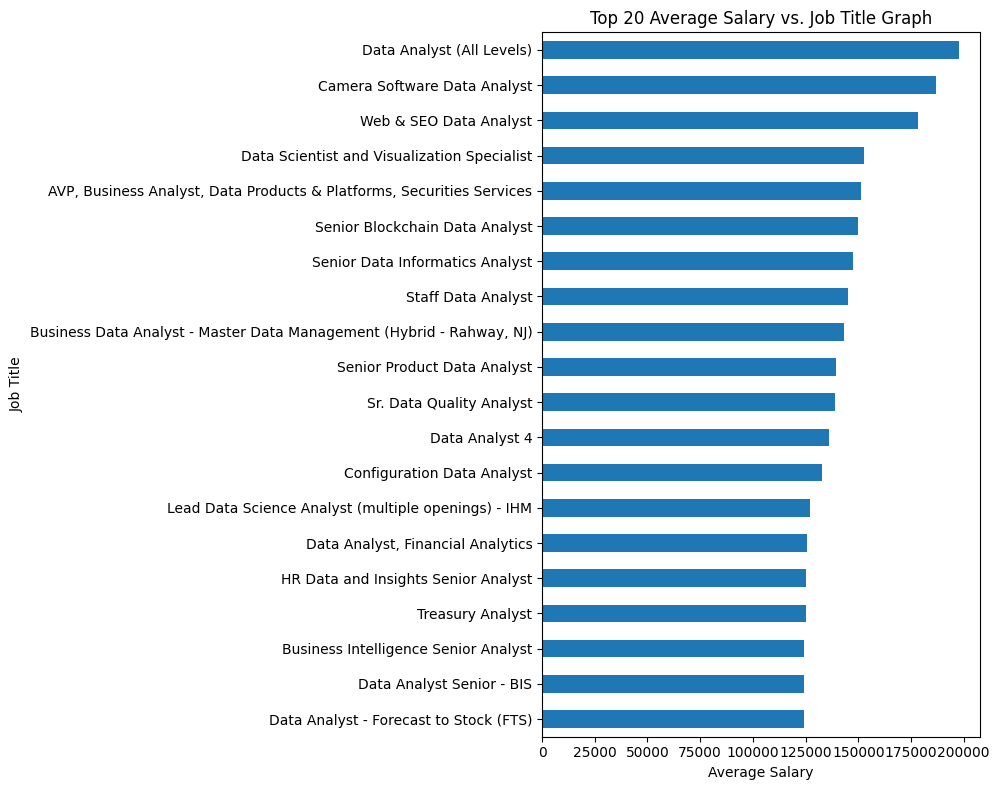

In [26]:
# Visualization 1: Average Salary vs. Job Title graph
top_titles = res.groupby("Title")["Average_Salary"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 8))
top_titles.sort_values().plot(kind="barh")
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.title("Top 20 Average Salary vs. Job Title Graph")
plt.tight_layout()
plt.show()

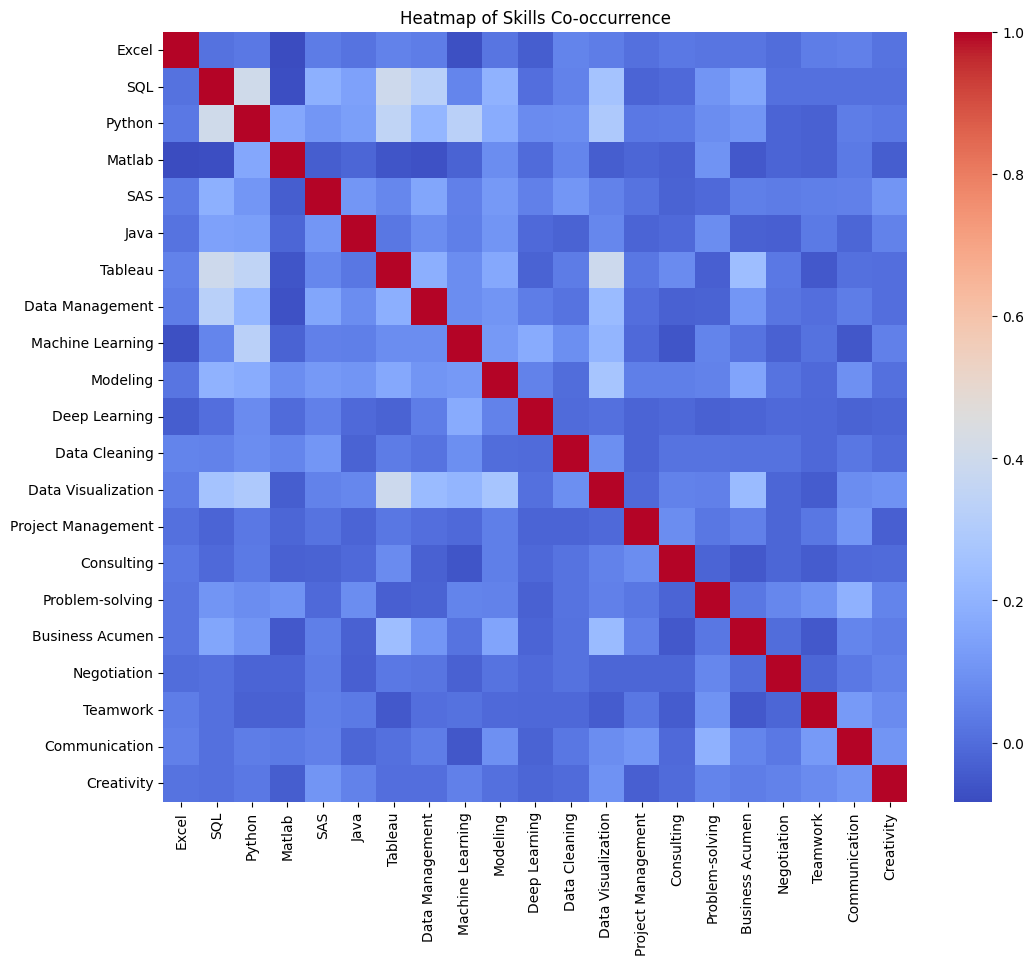

In [27]:
# Visualization 2: Heatmap of Skills Co-occurrence
skills_columns_2b2 = list(res.columns[5:-1])
if "R" in skills_columns_2b2:
  skills_columns_2b2.remove("R")
skills_data_2b2 = res[skills_columns_2b2]
# Calculate the correlation matrix to see how skills co-occur
correlation_matrix_2b2 = skills_data_2b2.astype(float).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_2b2, annot=False, cmap="coolwarm")
plt.title("Heatmap of Skills Co-occurrence")
plt.show()

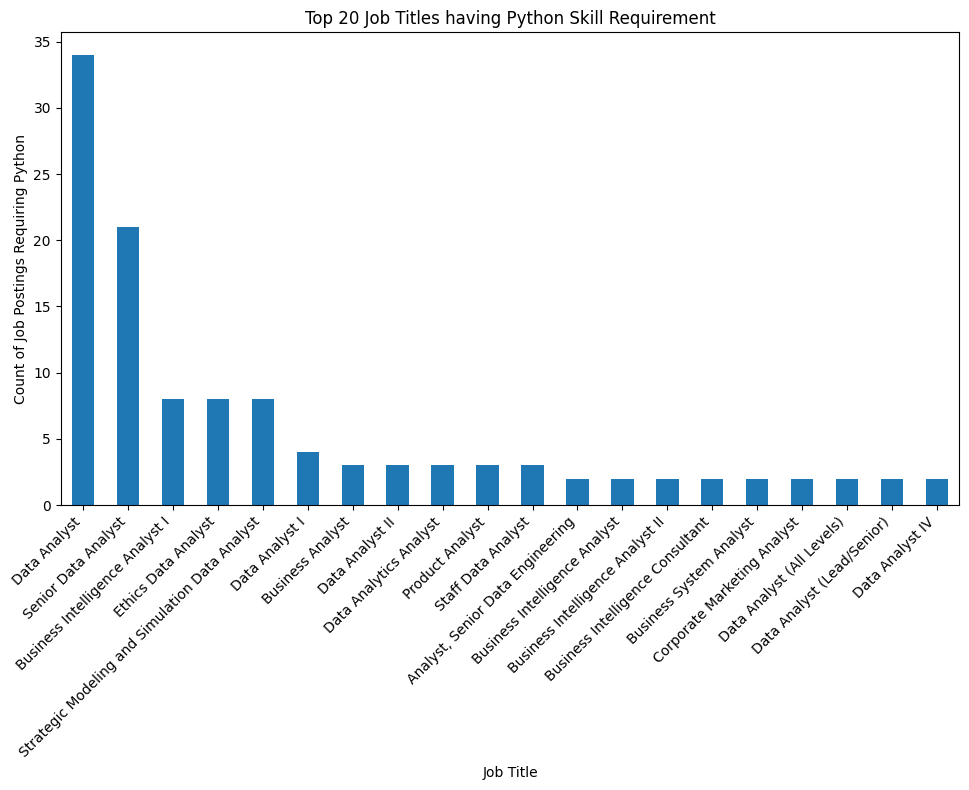

In [28]:
# Visualization 3: Distribution of a skill across job titles
res["Python"] = pd.to_numeric(res["Python"], errors="coerce")
skill_distribution_2b3 = res.groupby("Title")['Python'].sum()
top_titles_by_python = skill_distribution_2b3.nlargest(20)
# Plotting the top 20 job titles required Python skill count
top_titles_by_python.plot(kind="bar", figsize=(10, 8))
plt.xlabel("Job Title")
plt.ylabel("Count of Job Postings Requiring Python")
plt.title("Top 20 Job Titles having Python Skill Requirement")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

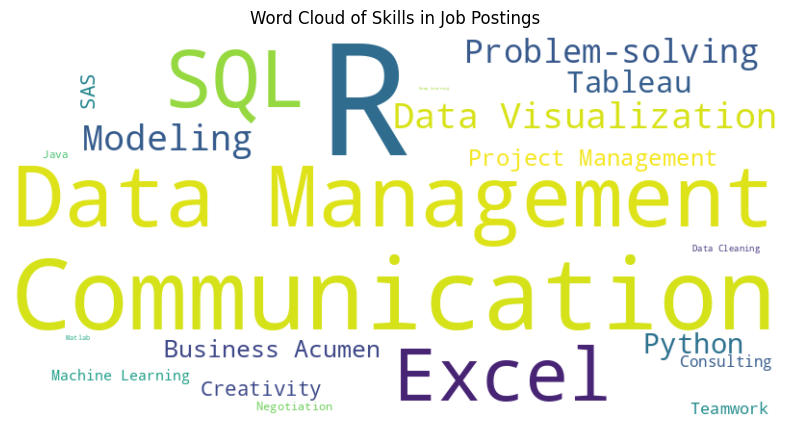

In [29]:
# Visualization 4: Distribution of a skill across job titles
# Convert skill columns to numeric, replacing non-numeric values with 0
for column in res.columns[5:-1]:
  res[column] = pd.to_numeric(res[column], errors="coerce").fillna(0)
skill_counts_2b4 = res.iloc[:, 5:-1].sum().sort_values(ascending=False)
# Generate a word cloud image from the frequencies of the skills
wordcloud_2b4 = WordCloud(background_color="white", width=800, height=400, max_words=200).generate_from_frequencies(skill_counts_2b4.to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_2b4, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Skills in Job Postings")
plt.show()

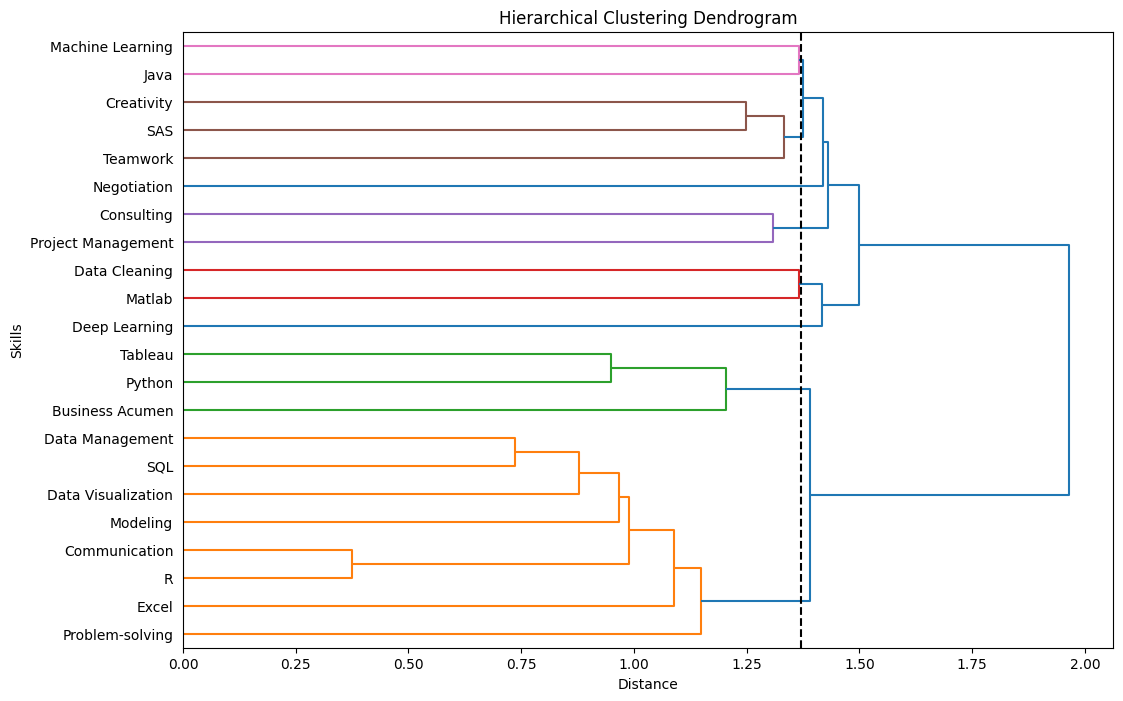

In [30]:
# Selects skill-related columns
skills_columns = res.columns[5:-1]
# Extract the binary skills data
binary_skills_data = res[skills_columns].values

# Calculate the Jaccard distance matrix
D = np.zeros((len(skills_columns), len(skills_columns)))
for i in range(len(skills_columns)):
    for j in range(i, len(skills_columns)):
        intersection = np.logical_and(binary_skills_data[:, i], binary_skills_data[:, j]).sum()
        union = np.logical_or(binary_skills_data[:, i], binary_skills_data[:, j]).sum()
        jaccard_similarity = intersection / union if union != 0 else 0
        jaccard_distance = 1 - jaccard_similarity
        D[i, j] = D[j, i] = jaccard_distance

# Perform hierarchical clustering using complete linkage
Y = sch.linkage(D, method="complete")

# Plotting the dendrogram
max_d = 1.37
plt.figure(figsize=(12, 8))
Z = sch.dendrogram(Y, labels=skills_columns, orientation="right", color_threshold=max_d)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Distance")
plt.ylabel("Skills")
# Draw a line to mark the cutoff in the dendrogram
plt.axvline(x=max_d, c="k", linestyle="--")
plt.show()

In [31]:
# Identifying clusters using the 'max_d' cutoff
lbs = sch.fcluster(Y, max_d, criterion="distance")
clusters3 = {i: [] for i in np.unique(lbs)}
for i, label in enumerate(skills_columns):
    clusters3[lbs[i]].append(label)

# Displaying the clusters and their assigned skills
for cluster, skills in clusters3.items():
    print(f"Course {cluster}: {', '.join(skills)}")
print(f"Number of automatically created courses: {len(clusters3)}")

Course 1: Excel, SQL, R, Data Management, Modeling, Data Visualization, Problem-solving, Communication
Course 2: Python, Tableau, Business Acumen
Course 3: Matlab, Data Cleaning
Course 4: Deep Learning
Course 5: Project Management, Consulting
Course 6: SAS, Teamwork, Creativity
Course 7: Java, Machine Learning
Course 8: Negotiation
Number of automatically created courses: 8


In [32]:
# Save the dataframe which only includes the skills column
skills_df = res.drop(columns=["Title", "Company", "Location", "Salary", "Descriptions", "Average_Salary"])
# Get all the column name of this dataset
skills_col = list(skills_df.columns)

In [33]:
# Feature 1: Skill Frequency
res["skill_freq"] = res[skills_col].sum(axis=1)

# Feature 2: Average Salary (already defined)

# Feature 3: Description Length
res["description_length"] = res["Descriptions"].apply(lambda x: len(x.split()))

# Feature 4: Count for Hard Skills
skills_hard = ["Excel", "SQL", "Python", "R", "Matlab", "SAS", "Java", "Tableau", "Data Management", "Machine Learning", "Modeling", "Deep Learning"]
res["hard_skills"] = res[skills_hard].sum(axis=1)

# Feature 5: Count for Soft Skills
skills_soft = ["Communication", "Teamwork", "Creativity", "Problem-solving", "Negotiation"]
res["soft_skills"] = res[skills_soft].sum(axis=1)

# Feature 6: Presence in High Salary Jobs
high_salary = res["Average_Salary"].median()
res["high_salary_job"] = res["Average_Salary"].apply(lambda x: 1 if x >= high_salary else 0)

# Feature 7: Presence in Job Title
res["skill_title"] = res["Title"].apply(lambda x: sum(skill.lower() in x.lower() for skill in skills_col))

# Feature 8: Diversity of Skill
res["skill_diversity"] = res[skills_col].apply(lambda row: sum(row > 0), axis=1)

# Feature 9: Skill Correlation with Salary
# Calculating the correlation of each skill with Average_Salary
for skill in skills_col:
  res[f'{skill}_salary_corr'] = res[skill] * res["Average_Salary"]
res["skill_salary_correlation"] = res[[f'{skill}_salary_corr' for skill in skills_col]].mean(axis=1)

# Feature 10: Company Demand for Skill
skill_company_demand = res.groupby("Company")[skills_col].mean()
# For each job posting in 'res', get the company demand for its skills
res["company_demand"] = res.apply(lambda row: skill_company_demand.loc[row["Company"], skills_col].mean(), axis=1)

In [34]:
# Preparing for clustering
cluster_features = ["skill_freq", "Average_Salary", "description_length", "hard_skills", "soft_skills", "high_salary_job", "skill_title", "skill_diversity", "skill_salary_correlation", "company_demand"]
clustering_df = res[cluster_features]
clustering_df = clustering_df.fillna(0)

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(clustering_df)

The optimal number of clusters, k, is: 3


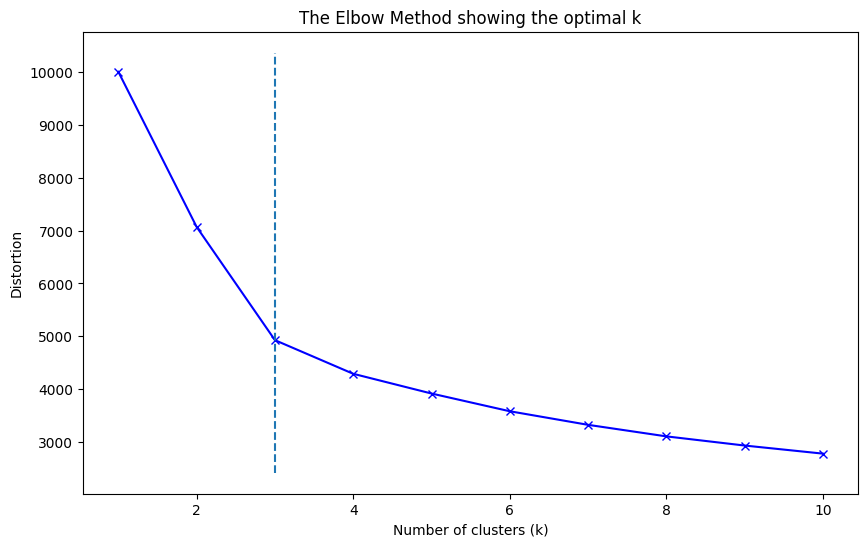

In [35]:
# Calculate distortions for a range of number of clusters
distortions = []
K = range(1, 11)
for k in K:
  kmeanModel = KMeans(n_clusters=k, random_state=0)
  kmeanModel.fit(features_normalized)
  distortions.append(kmeanModel.inertia_)

# Find the elbow point automatically
kneedle = KneeLocator(K, distortions, curve="convex", direction="decreasing")
print(f"The optimal number of clusters, k, is: {kneedle.elbow}")

# Plotting the elbow method graph with the elbow point marked
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, "bx-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.vlines(kneedle.elbow, plt.ylim()[0], plt.ylim()[1], linestyles="dashed")
plt.show()

In [37]:
# Apply k-means clustering
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(features_normalized)

# Add cluster labels to the DataFrame
res["Cluster"] = clusters

# Develop course curriculum based on clustering results
curriculum = {}
for i in range(k):
  cluster_skills = res[res["Cluster"] == i][skills_col].sum().sort_values(ascending=False)
  top_skills = cluster_skills.index[:3].tolist()
  curriculum[f'Course_{i+1}'] = top_skills

# Display the curriculum
for course, skills in curriculum.items():
  print(f"{course}: {', '.join(skills)}")

Course_1: R, Communication, Data Management
Course_2: R, Communication, SQL
Course_3: R, SQL, Data Visualization
Course_4: R, Communication, Modeling
Course_5: R, Communication, Data Management
Course_6: R, Communication, SQL
Course_7: R, Communication, Data Management
Course_8: R, Communication, Problem-solving
Course_9: R, Data Management, SQL
Course_10: R, Communication, Data Management


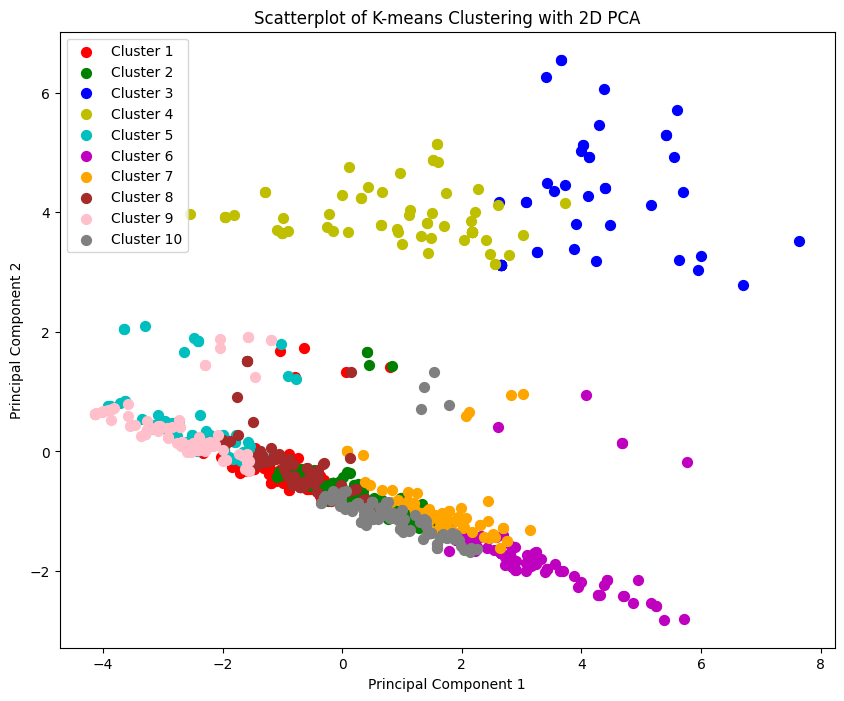

In [38]:
# Apply PCA to reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_normalized)

# Create a DataFrame with the 2 principal components
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])

# Add the cluster labels to this DataFrame
pca_df["Cluster"] = clusters

# Plotting the scatterplot for k-means clustering with 2D PCA
plt.figure(figsize=(10, 8))
colors = ["r", "g", "b", "y", "c", "m", "orange", "brown", "pink", "gray"]
for i in range(k):
  cluster_data = pca_df[pca_df['Cluster'] == i]
  plt.scatter(cluster_data["PC1"], cluster_data["PC2"], s=50, c=colors[i], label=f'Cluster {i+1}')
plt.title("Scatterplot of K-means Clustering with 2D PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [39]:
# Define the prompt with the detailed description of clustering results
prompt_3 = """
Write a compelling and brief course curriculum description for a data science program based on the following course outlines::

Course 1: R, Communication, Data Management
Course 2: R, Communication, SQL
Course 3: R, SQL, Data Visualization
Course 4: R, Communication, Modeling
Course 5: R, Communication, Data Management
Course 6: R, Communication, SQL
Course 7: R, Communication, Data Management
Course 8: R, Communication, Problem-solving
Course 9: R, Data Management, SQL
Course 10: R, Communication, Data Management

The description should highlight the uniqueness of the program, the practical application of skills, and how it prepares students for a successful career in data science.
"""

In [40]:
# Make a call to the ChatGPT API to generate the description
response3 = openai.ChatCompletion.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are a knowledgeable and creative assistant."},
        {"role": "user", "content": prompt_3}
    ],
    temperature=temperature,
    max_tokens=max_tokens,
    stop=stop,
)

In [41]:
# Print the generated description
print(response3.choices[0].message["content"])

Welcome to our comprehensive Data Science program! This unique curriculum is designed to equip students with the essential skills and knowledge needed to excel in the rapidly growing field of data science. 

Throughout this program, students will gain a deep understanding of the R programming language, which is widely recognized as one of the most powerful tools for data analysis and statistical modeling. With a strong foundation in R, students will be able to effectively manipulate, analyze, and visualize data, allowing them to extract valuable insights and make data-driven decisions.

What sets this program apart is its emphasis on communication and problem-solving skills. In each course, students will not only learn how to work with data, but also how to effectively communicate their findings to both technical and non-technical stakeholders. This crucial skill ensures that students can effectively convey complex information in a clear and concise manner, making them invaluable asset

In [42]:
# Define the second prompt for deeper analysis of clustering results
prompt_4 = """
Based on the clustering results used to develop the following data science program courses:

Course 1: R, Communication, Data Management
Course 2: R, Communication, SQL
Course 3: R, SQL, Data Visualization
Course 4: R, Communication, Modeling
Course 5: R, Communication, Data Management
Course 6: R, Communication, SQL
Course 7: R, Communication, Data Management
Course 8: R, Communication, Problem-solving
Course 9: R, Data Management, SQL
Course 10: R, Communication, Data Management

Please analyze and describe the similarities within these clusters. Highlight common themes, skills, and trends that these clusters reveal about the data science field. Discuss how these clusters reflect the interdisciplinary nature of data science and the integration of technical and soft skills in the profession.
"""

In [43]:
# Make a call to the ChatGPT API to generate the description
response4 = openai.ChatCompletion.create(
    model=model,
    messages=[
        {"role": "system", "content": "You are a knowledgeable and creative assistant."},
        {"role": "user", "content": prompt_4}
    ],
    temperature=temperature,
    max_tokens=max_tokens,
    stop=stop,
)

In [44]:
# Print the generated analysis
print(response4.choices[0].message["content"])

Based on the provided clustering results, we can observe several common themes, skills, and trends within the clusters of data science courses:

Cluster 1: R, Communication, Data Management
Courses: 1, 5, 7, 10

This cluster highlights the importance of R programming language as a fundamental skill in data science. It also emphasizes the significance of effective communication skills and the ability to manage and manipulate data. The courses in this cluster likely focus on teaching students how to use R for data analysis, data manipulation, and data cleaning, as well as how to effectively communicate their findings to stakeholders.

Cluster 2: R, Communication, SQL
Courses: 2, 6

This cluster shares similarities with Cluster 1, as it also includes R and communication skills. However, it adds SQL as an additional skill. SQL is a powerful language for managing and querying relational databases, and its inclusion in this cluster suggests that these courses likely focus on teaching student

In [45]:
# Generate embeddings for job descriptions
def generate_embeddings(text_description):
    response = openai.Embedding.create(
        input=text_description,
        model="text-embedding-ada-002"
    )
    return response["data"][0]["embedding"]

embeddings = [generate_embeddings(description) for description in res["Descriptions"]]

In [46]:
# Normalize embeddings
scaler = StandardScaler()
embeddings_normalized2 = scaler.fit_transform(embeddings)

# Apply k-means clustering to embeddings
k_2 = 10
kmeans2 = KMeans(n_clusters=k_2, random_state=0)
clusters_embeddings = kmeans2.fit_predict(embeddings_normalized2)

# Add cluster labels to the dataFrame
res["Cluster_Embeddings"] = clusters_embeddings

In [47]:
# Develop course curriculum based on clustering results
curriculum_embeddings = {}
for i in range(k_2):
    cluster_skills2 = res[res["Cluster_Embeddings"] == i][skills_col].sum().sort_values(ascending=False)
    top_skills2 = cluster_skills2.index[:3].tolist()
    curriculum_embeddings[f'Course_{i+1}'] = top_skills2

# Display the additional curriculum based on embeddings clustering
for course, skills in curriculum_embeddings.items():
    print(f"{course}: {', '.join(skills)}")

Course_1: R, Excel, Communication
Course_2: R, SQL, Communication
Course_3: R, Data Management, Communication
Course_4: R, Communication, Excel
Course_5: R, Communication, Data Management
Course_6: R, Communication, Problem-solving
Course_7: R, Communication, Data Management
Course_8: R, Communication, Data Management
Course_9: R, Communication, Data Management
Course_10: R, Communication, SQL
